<a href="https://colab.research.google.com/github/alshashiguchi/machine_learning_colab/blob/master/Fiilmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introdução a algoritmos não supervisionados

## Conhecendo o dataset

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv")

In [3]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [0]:
filmes.columns = ['filme_id', 'titulo', 'generos']

In [6]:
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Extraindo os dummies

In [7]:
filmes.generos.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: generos, dtype: object

In [8]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
dados_dos_filmes = pd.concat([filmes, generos], axis = 1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Escalando os dados

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [12]:
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

# Começando a agrupar

## Conhecendo o KMeans

In [0]:
from sklearn.cluster import KMeans

In [0]:
modelo = KMeans(n_clusters=3)

In [15]:
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
print(f'Grupos {modelo.labels_}')

Grupos [1 1 2 ... 0 1 2]


# Vendo os centroides

## Visualizando os centroids

In [17]:
print(generos.columns)
print(f'Grupos { modelo.cluster_centers_ }')

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
Grupos [[ 0.04490582  0.12376766 -0.04681388 -0.25346679 -0.25182559 -0.76541974
   0.10896657  0.12851791  0.29425868 -0.09712303  0.06819163  0.14895043
   0.00595447 -0.0832468   0.13060606 -0.1241101   0.09171323  0.30890108
   0.09655442  0.04179445]
 [-0.05917995  0.07800802  1.07836047  2.62653726  2.20147791  0.09690805
  -0.29341328 -0.20631678 -0.62728473  1.0524643  -0.08259444 -0.26070964
   0.4134677   0.44276241 -0.12178994 -0.25457042  0.20551609 -0.44142559
  -0.16615871 -0.09631557]
 [-0.05917995 -0.22531935 -0.20061199 -0.25744465 -0.15049746  1.24397641
  -0.10495169 -0.15983707 -0.32600402 -0.11052373 -0.0917441  -0.17967816
  -0.11654922  0.02377816 -0.18510746  0.27144134 -0.20507466 -0.398

In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)

In [19]:
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.044906,0.123768,-0.046814,-0.253467,-0.251826,-0.765420,0.108967,0.128518,0.294259,-0.097123,0.068192,0.148950,0.005954,-0.083247,0.130606,-0.124110,0.091713,0.308901,0.096554,0.041794
1,-0.059180,0.078008,1.078360,2.626537,2.201478,0.096908,-0.293413,-0.206317,-0.627285,1.052464,-0.082594,-0.260710,0.413468,0.442762,-0.121790,-0.254570,0.205516,-0.441426,-0.166159,-0.096316
2,-0.059180,-0.225319,-0.200612,-0.257445,-0.150497,1.243976,-0.104952,-0.159837,-0.326004,-0.110524,-0.091744,-0.179678,-0.116549,0.023778,-0.185107,0.271441,-0.205075,-0.398232,-0.117206,-0.044440


In [20]:
grupos.transpose()

,0,1,2
(no genres listed),0.044906,-0.059180,-0.059180
Action,0.123768,0.078008,-0.225319
Adventure,-0.046814,1.078360,-0.200612
Animation,-0.253467,2.626537,-0.257445
Children,-0.251826,2.201478,-0.150497
Comedy,-0.765420,0.096908,1.243976
Crime,0.108967,-0.293413,-0.104952
Documentary,0.128518,-0.206317,-0.159837
Drama,0.294259,-0.627285,-0.326004
Fantasy,-0.097123,1.052464,-0.110524


Analise grafica dos grupos por tipo de filme

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e02473470>,
      dtype=object)

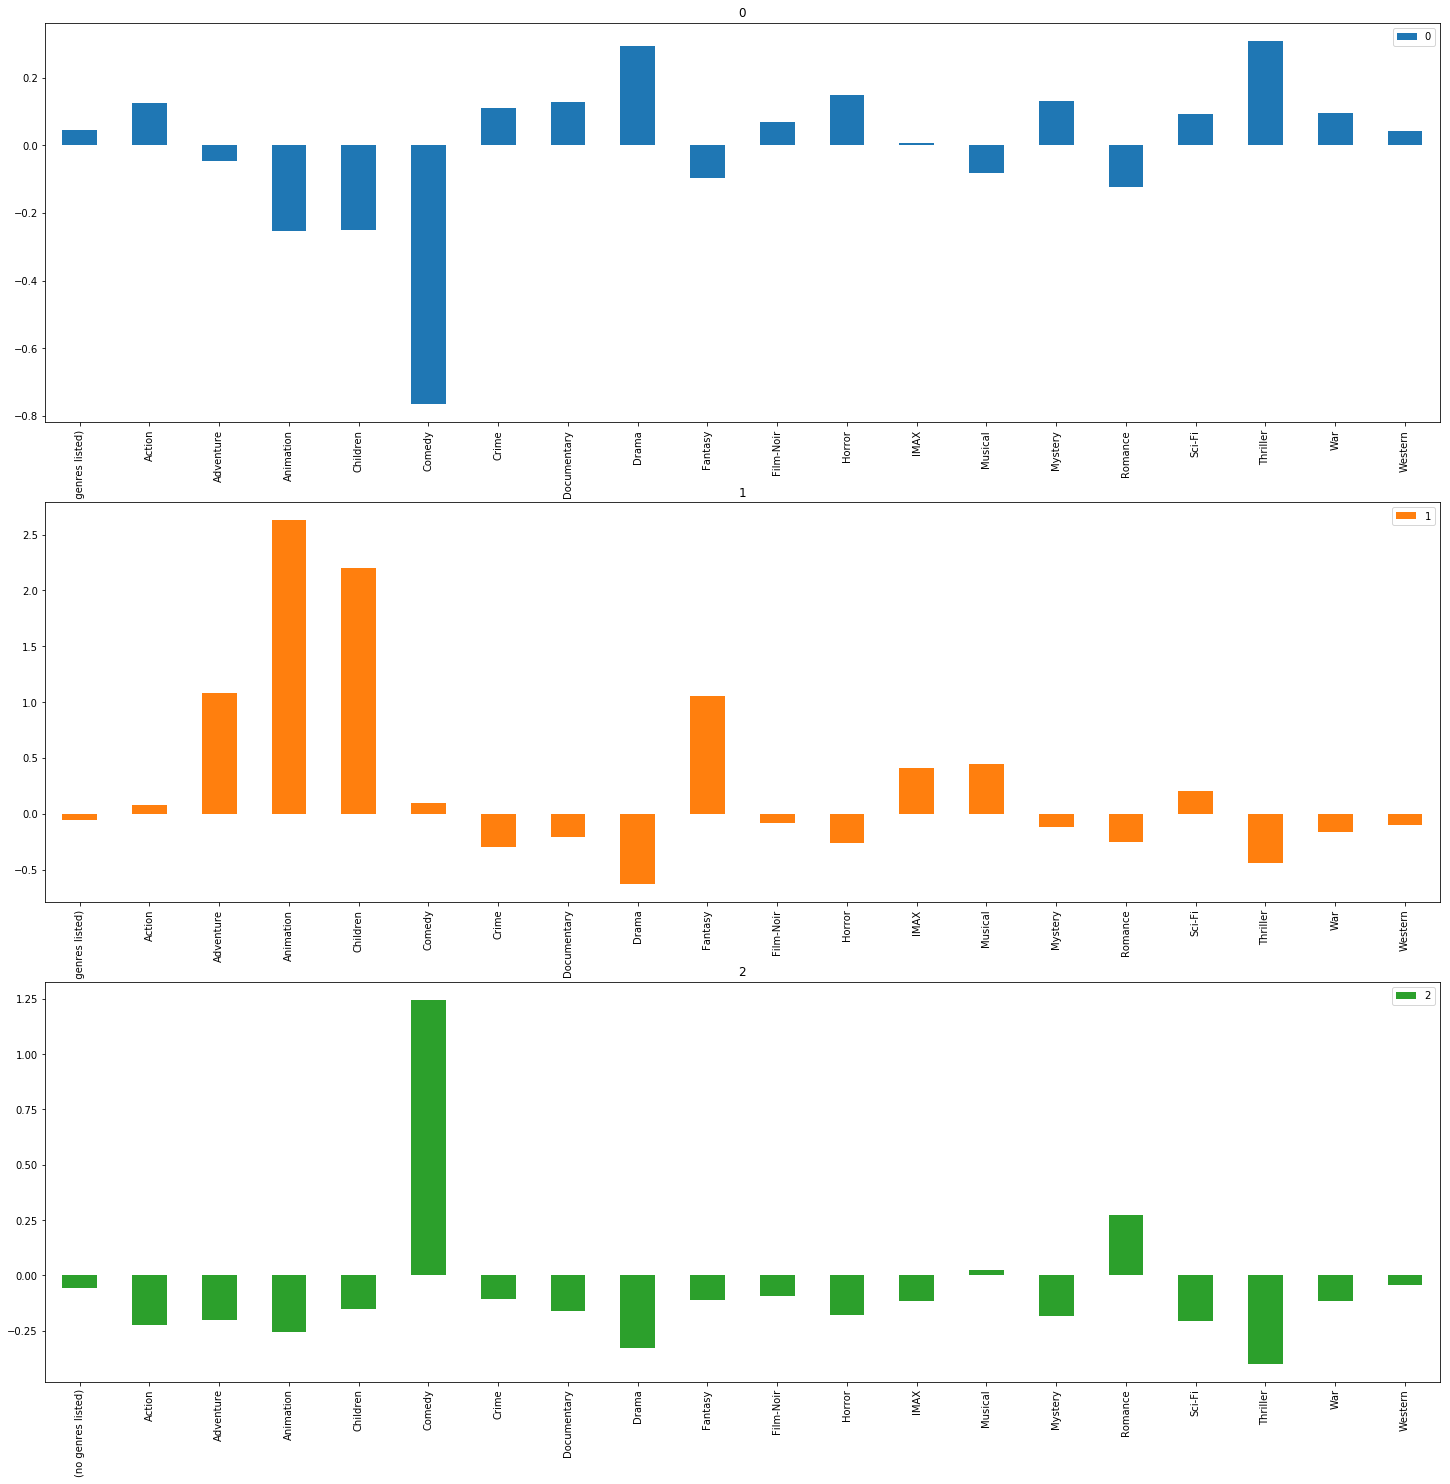

In [21]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False)

Visualizando os filmes que fazem parte do grupo

In [22]:
grupo = 1
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4208,6093,"Last Unicorn, The (1982)",Animation|Children|Fantasy,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9585,175387,On the Trail of the Bremen Town Musicians (1973),Adventure|Animation|Children,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
355,410,Addams Family Values (1993),Children|Comedy|Fantasy,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8931,136297,Mortal Kombat: The Journey Begins (1995),Action|Animation,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2734,3672,Benji (1974),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5236,8580,Into the Woods (1991),Adventure|Comedy|Fantasy|Musical,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7925,95499,Dragon Ball Z: Broly - The Legendary Super Sai...,Action|Adventure|Animation,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
534,631,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
9276,157340,The Angry Birds Movie (2016),Animation|Comedy,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0


## Criando um gráfico com o seaborn

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE()

In [25]:
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-23.877556  , -46.601437  ],
       [ -2.6925216 , -58.250027  ],
       [ 36.262154  ,  25.454597  ],
       ...,
       [ -3.0186894 ,  22.81263   ],
       [-26.82884   , -23.795137  ],
       [ -0.46525148, -16.150444  ]], dtype=float32)

In [0]:
import seaborn as sns

Aparentemente os pontos estão muito proximos, mas devempos pensar de forma com varias dimensões, nesse caso tempo 20 dimensões

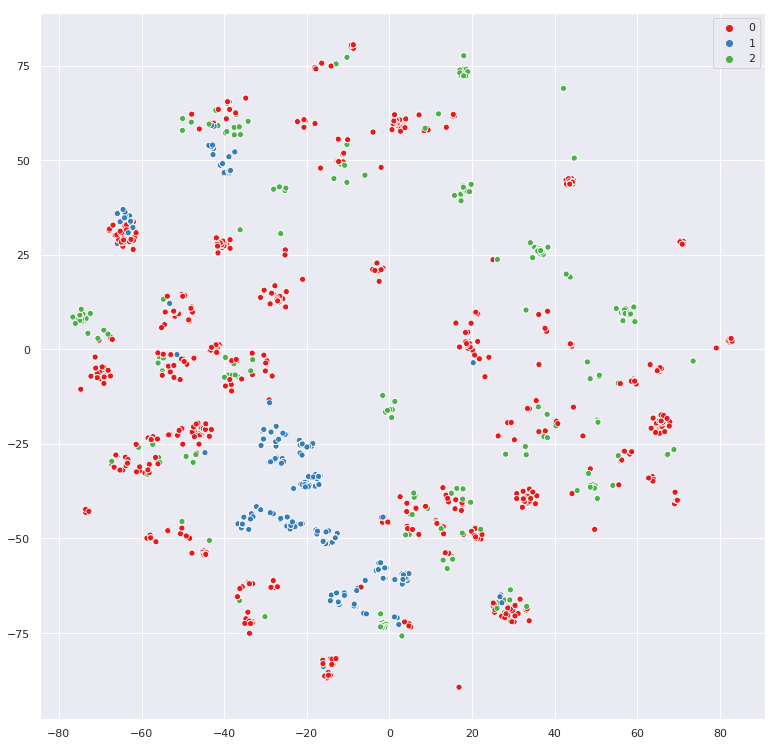

In [27]:
sns.set(rc={'figure.figsize': (13,13)})

sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=modelo.labels_, palette=sns.color_palette('Set1', 3))

# Escolhendo o numero de grupos

## Agrupando em 20 grupos

In [28]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dfd5197f0>,
      dtype=object)

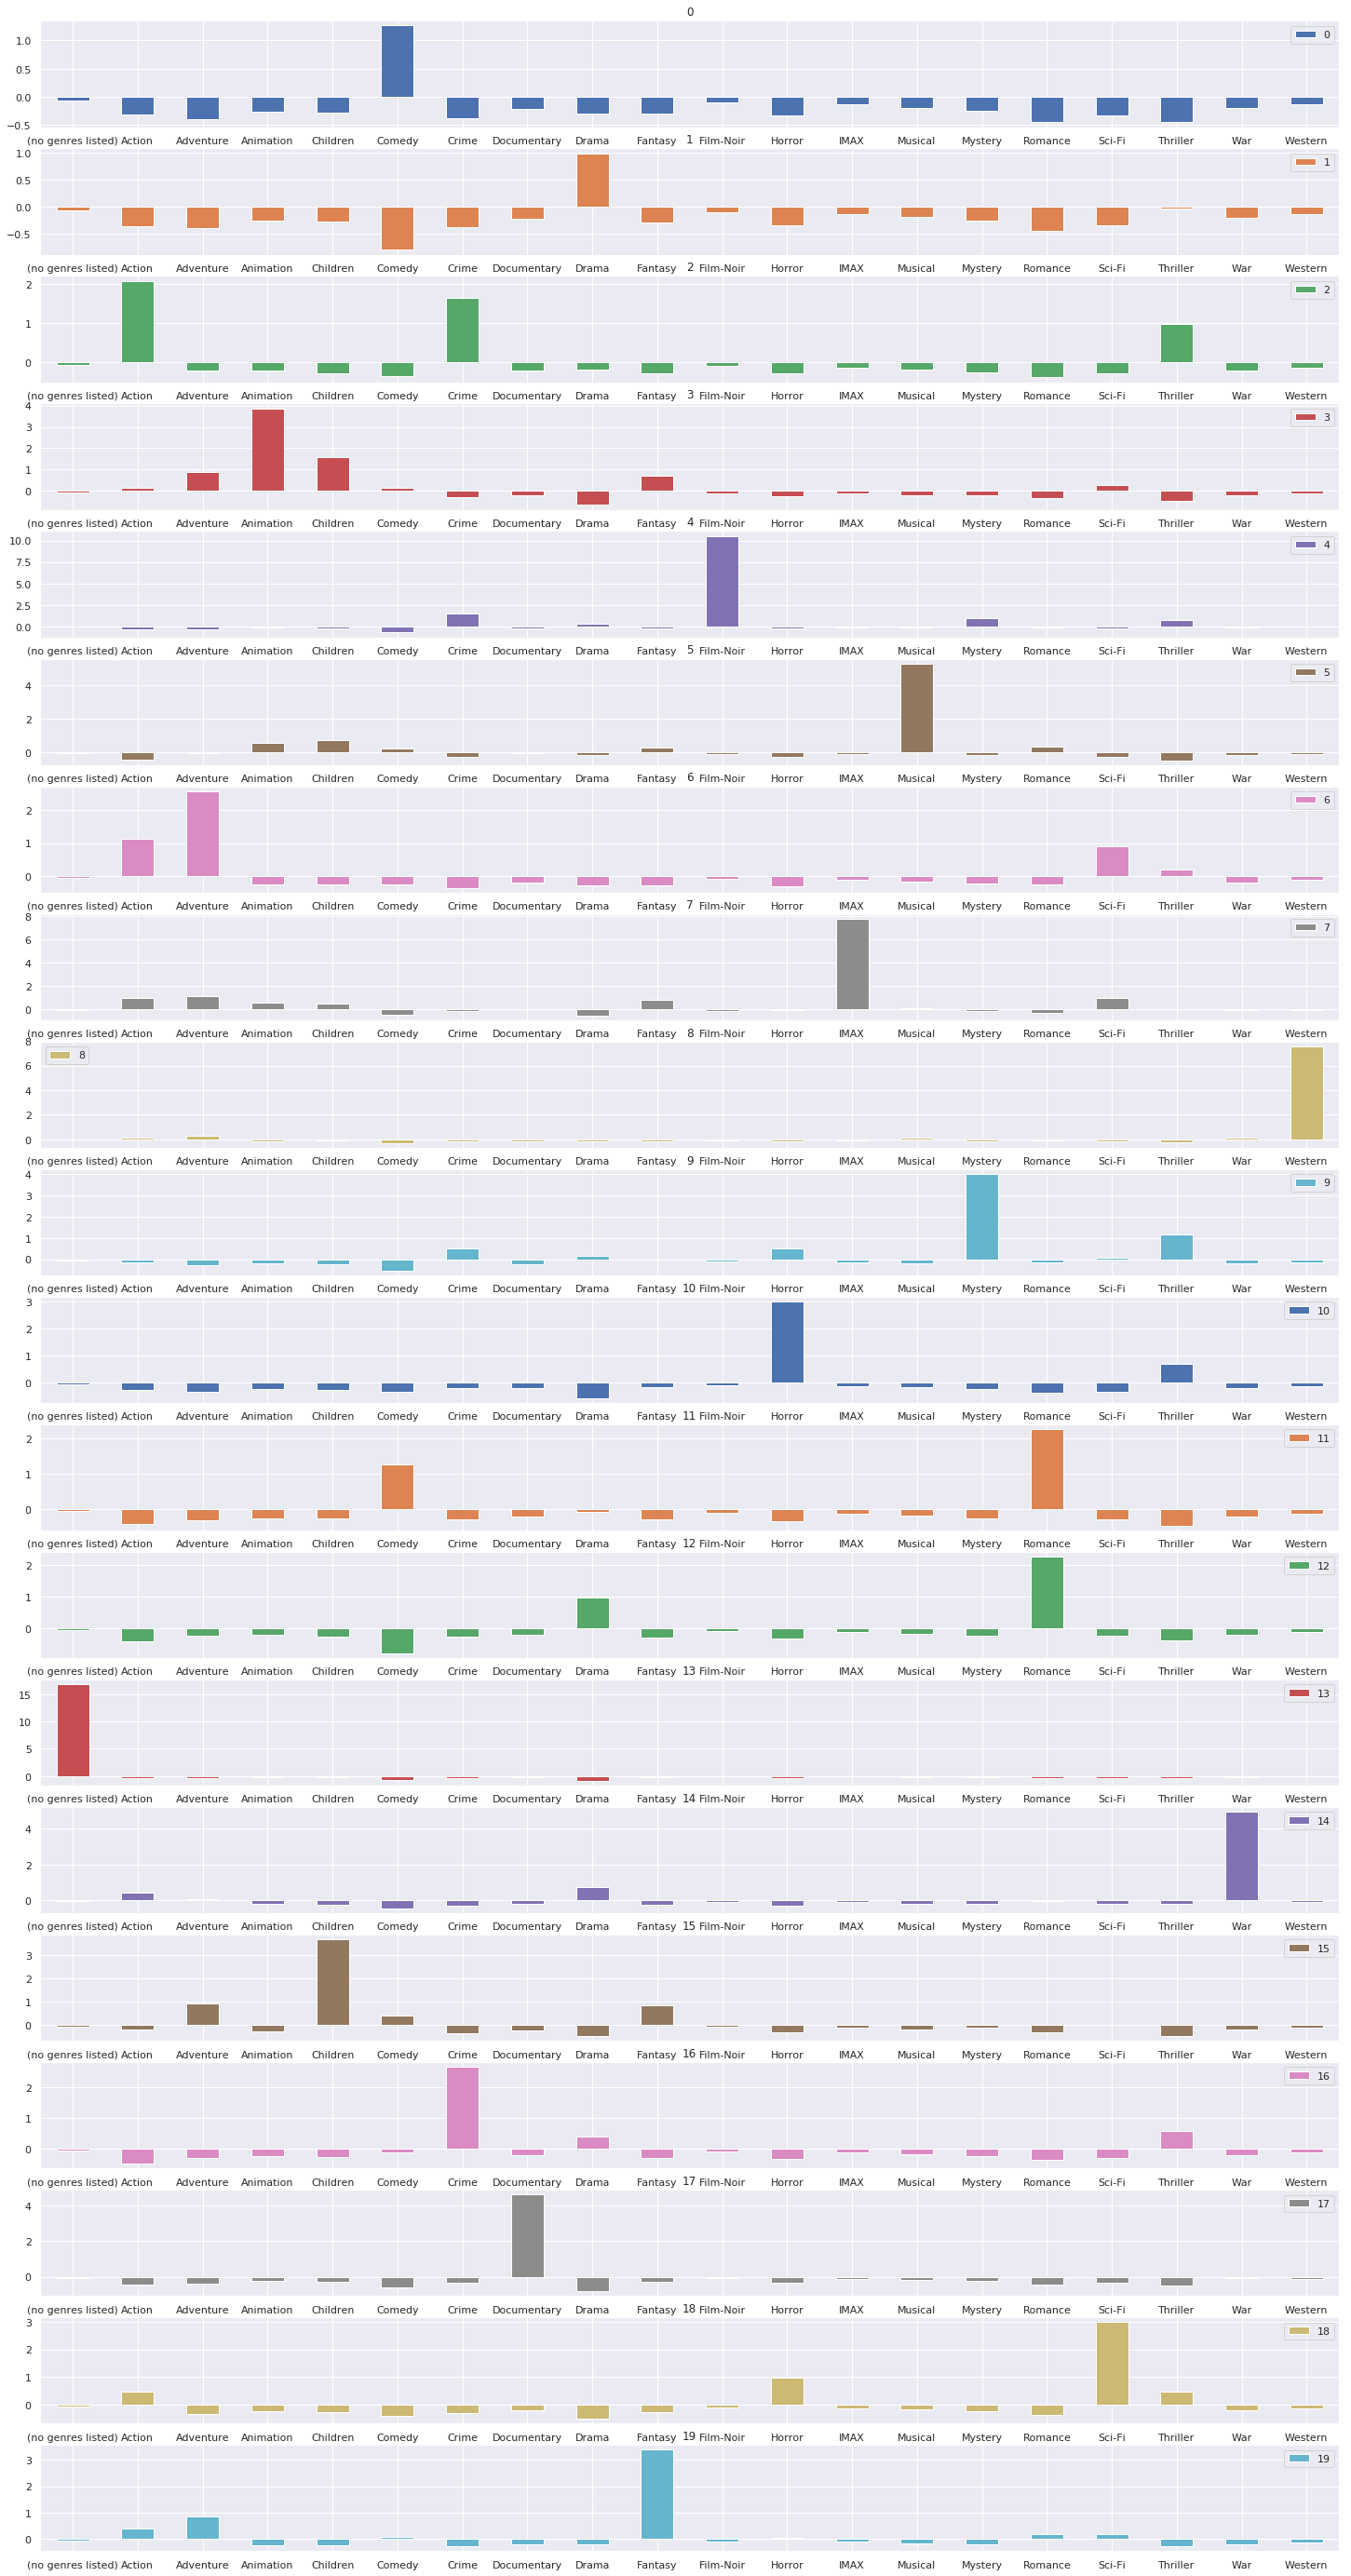

In [30]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [31]:
grupo = 8

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2835,3792,Duel in the Sun (1946),Drama|Romance|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1733,2328,Vampires (1998),Horror|Western,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5459,26142,Major Dundee (1965),Adventure|War|Western,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6557,54997,3:10 to Yuma (2007),Action|Crime|Drama|Western,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1061,1378,Young Guns (1988),Action|Comedy|Western,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2335,3093,McCabe & Mrs. Miller (1971),Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5101,8094,Bad Day at Black Rock (1955),Drama|Thriller|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3944,5550,Love Me Tender (1956),Musical|Western,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
360,416,Bad Girls (1994),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4367,6386,Nevada Smith (1966),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Quantos grupos escolher

In [0]:
def kmeans(numero_de_cluster, generos):
  modelo = KMeans(n_clusters=numero_de_cluster)
  modelo.fit(generos)
  return[numero_de_cluster, modelo.inertia_]

In [33]:
kmeans(20, generos_escalados)

[20, 54605.86228574744]

## O método do cotovelo

In [34]:
kmeans(3, generos_escalados)

[3, 166263.56920393746]

In [0]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)] 

In [36]:
resultado

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 166500.1822486266],
 [4, 155645.1483286985],
 [5, 147781.11838077457],
 [6, 137780.6453799501],
 [7, 129172.00953664594],
 [8, 118715.49809488794],
 [9, 111218.57766240848],
 [10, 101798.62797362814],
 [11, 93538.56309736232],
 [12, 86568.15487102282],
 [13, 80302.15181604464],
 [14, 73769.93125611413],
 [15, 69010.59604837552],
 [16, 63753.33206438253],
 [17, 61979.1358388915],
 [18, 58142.42641626366],
 [19, 58181.2393639512],
 [20, 54409.947344521446],
 [21, 53938.00078731541],
 [22, 51335.694667086595],
 [23, 50229.22912274468],
 [24, 49603.01594807446],
 [25, 48361.76782988775],
 [26, 47121.358846671515],
 [27, 45914.92188852716],
 [28, 44806.242369338805],
 [29, 43965.61032413517],
 [30, 42929.673879221395],
 [31, 41811.079805935944],
 [32, 40613.202468603675],
 [33, 39854.71686675083],
 [34, 39753.12531664145],
 [35, 38200.81426063171],
 [36, 37757.58286523265],
 [37, 36828.38900824727],
 [38, 35843.129856434774],
 [39, 36610.0875491

In [0]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])

In [38]:
resultado

,grupos,inertia
0,1,194840.000000
1,2,179664.999079
2,3,166500.182249
3,4,155645.148329
4,5,147781.118381
5,6,137780.645380
6,7,129172.009537
7,8,118715.498095
8,9,111218.577662
9,10,101798.627974


![alt text](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png)

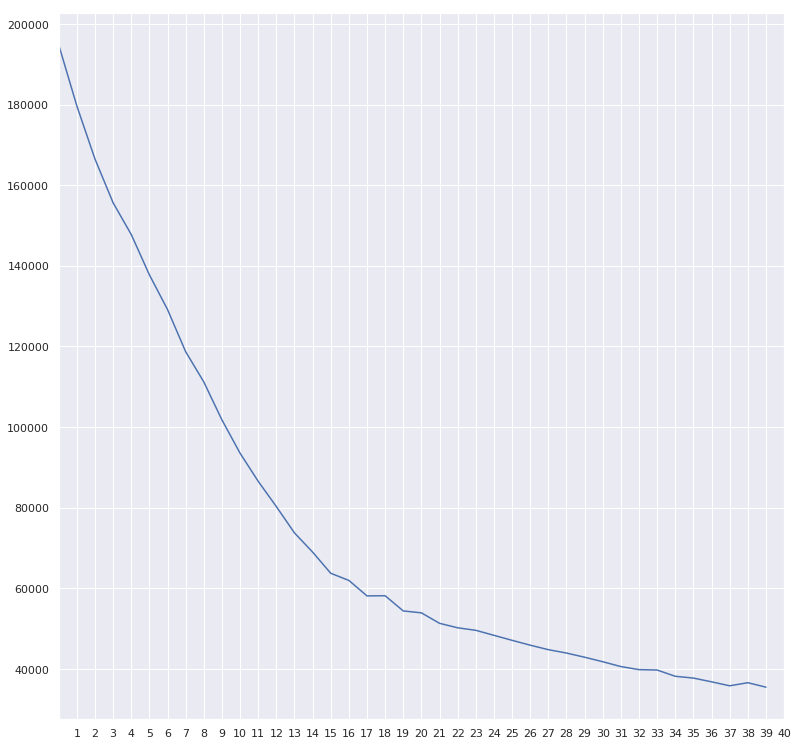

In [39]:
resultado.inertia.plot(xticks=resultado.grupos)

In [41]:
modelo = KMeans(n_clusters=15)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dfc8045c0>,
      dtype=object)

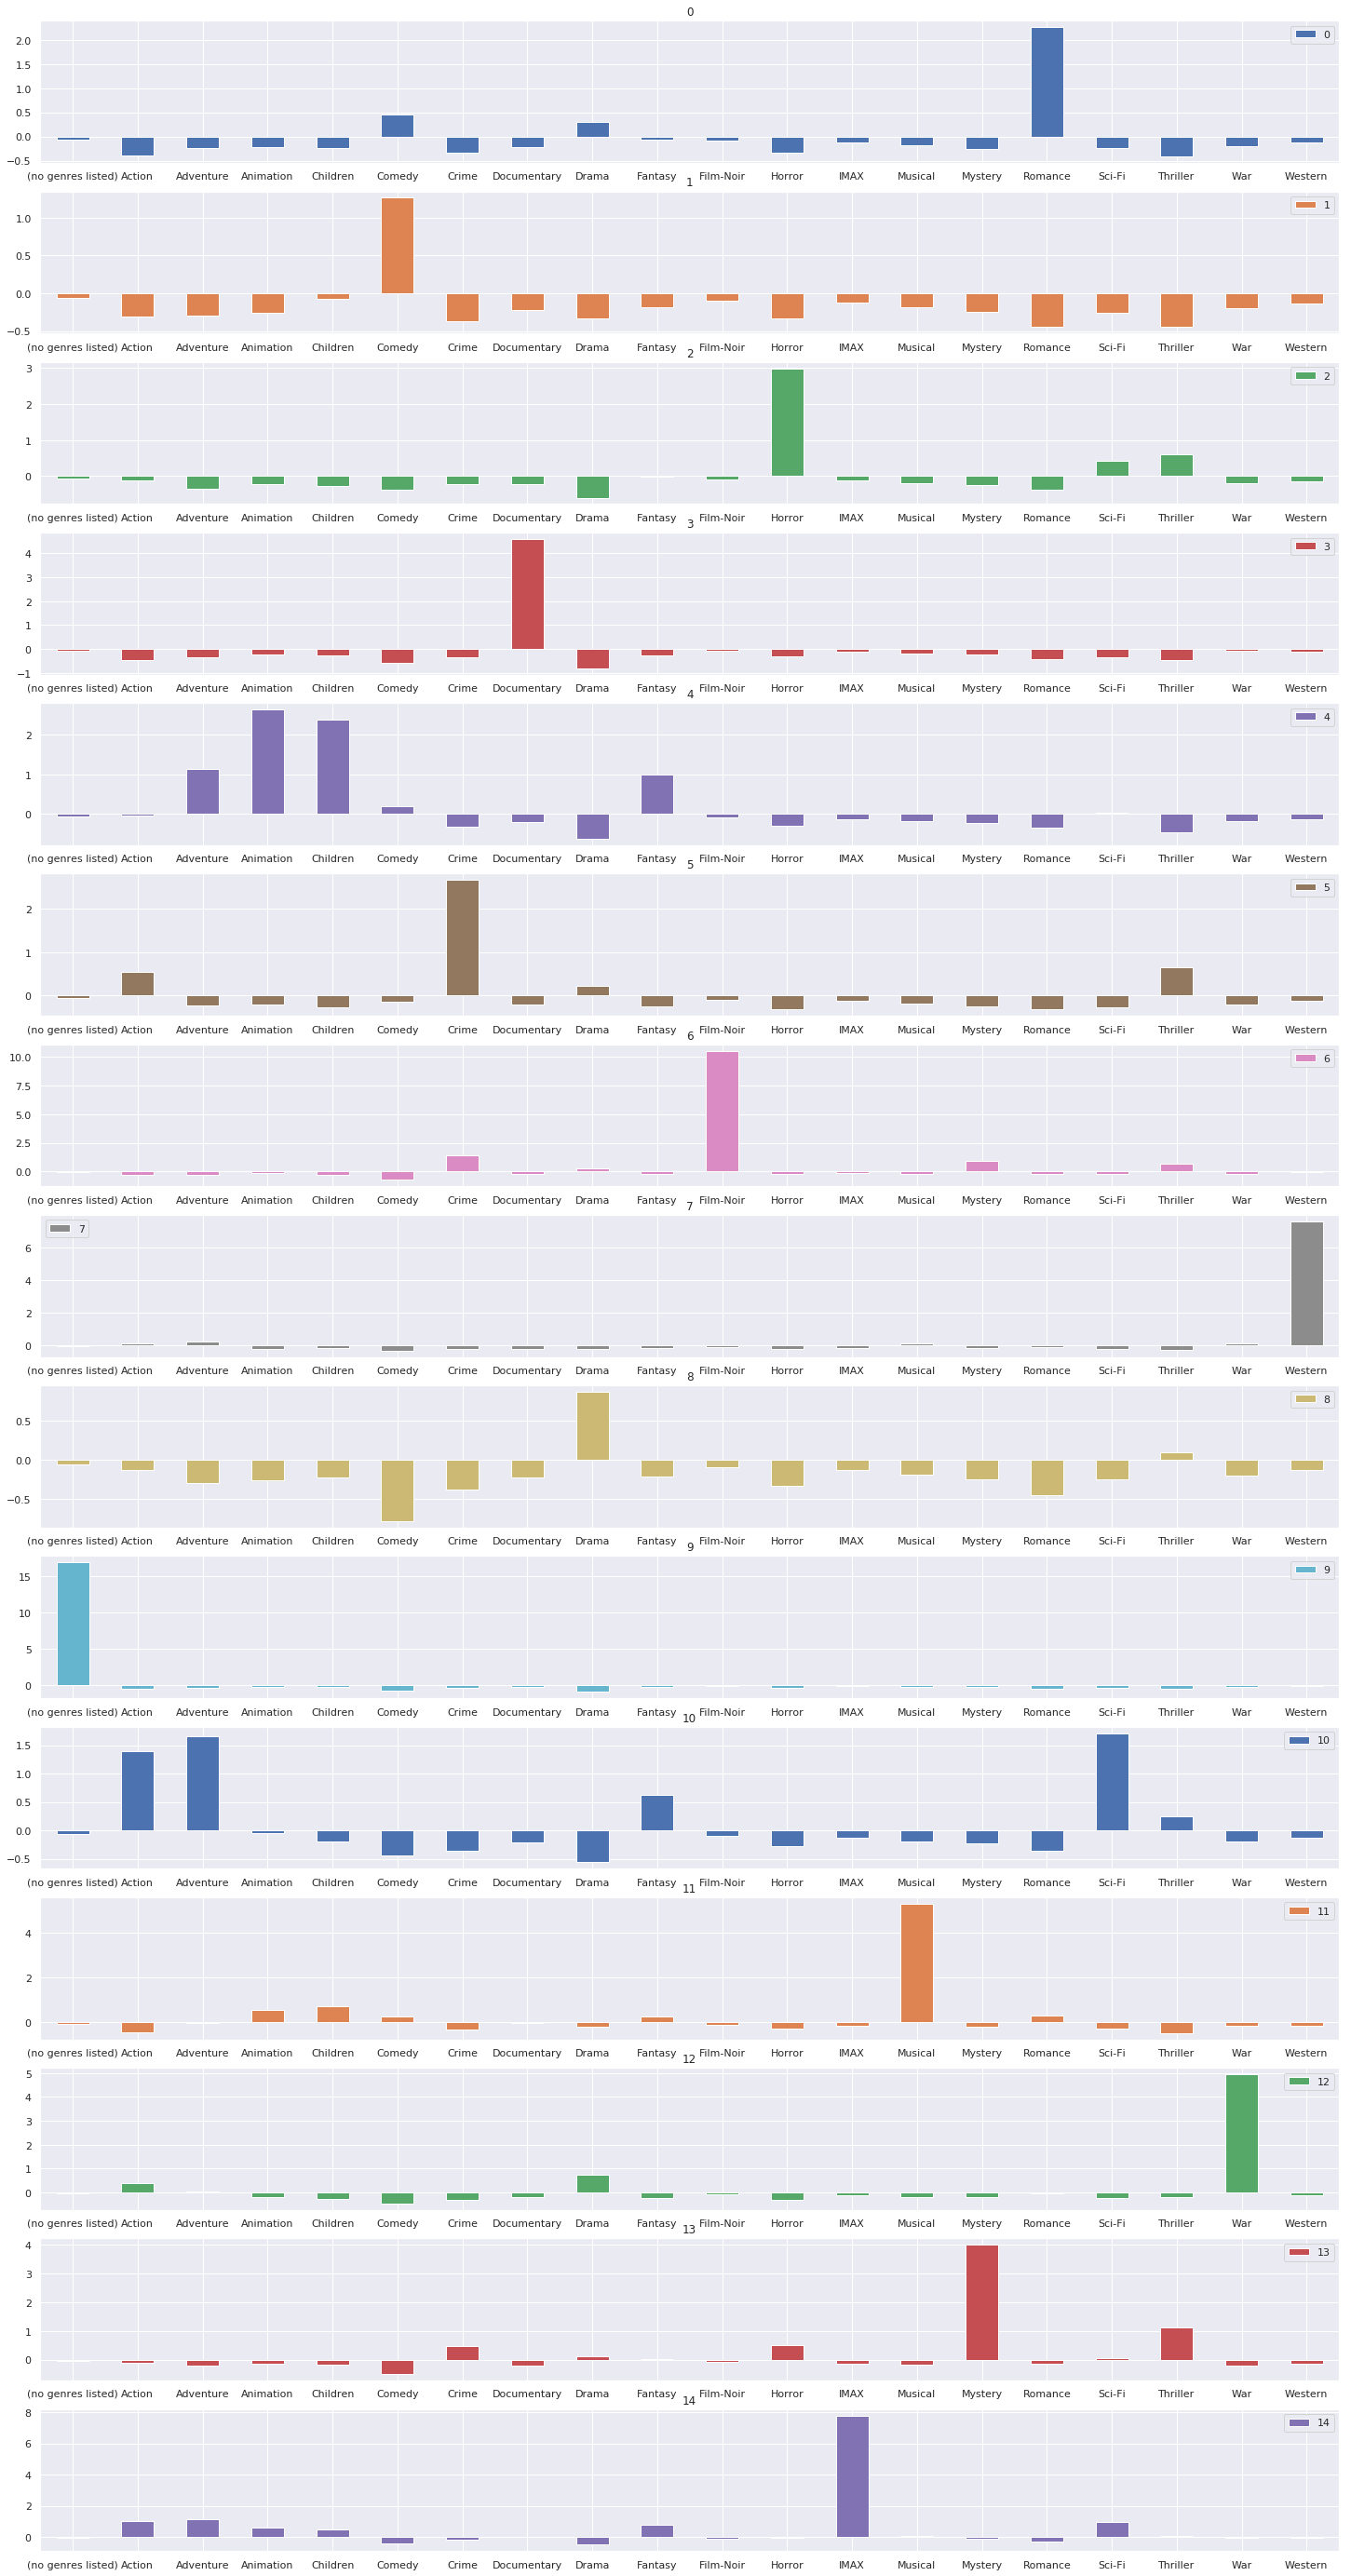

In [42]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [43]:
grupo = 12

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4114,5899,Zulu (1964),Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5576,26791,Shining Through (1992),Drama|Romance|Thriller|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
3856,5420,Windtalkers (2002),Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2303,3053,"Messenger: The Story of Joan of Arc, The (1999)",Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
872,1161,"Tin Drum, The (Blechtrommel, Die) (1979)",Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5286,8730,To End All Wars (2001),Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2820,3768,Braddock: Missing in Action III (1988),Action|War,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6116,42943,Revolution (1985),Adventure|Drama|War,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8555,115969,Generation War (2013),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1834,2436,Tea with Mussolini (1999),Comedy|Drama|War,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


#  Agrupamento hierárquico

## Conhecendo o agrupamento hierarquico

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
modelo = AgglomerativeClustering(n_clusters=15)
grupos = modelo.fit_predict(generos_escalados)

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

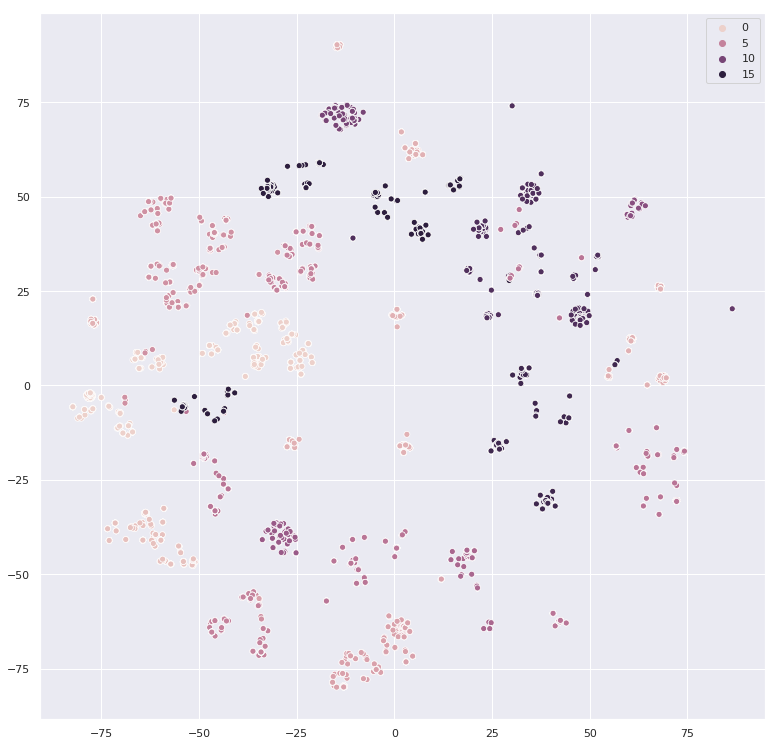

In [51]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

## Plotando um dendrograma

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dfbd64f28>,
      dtype=object)

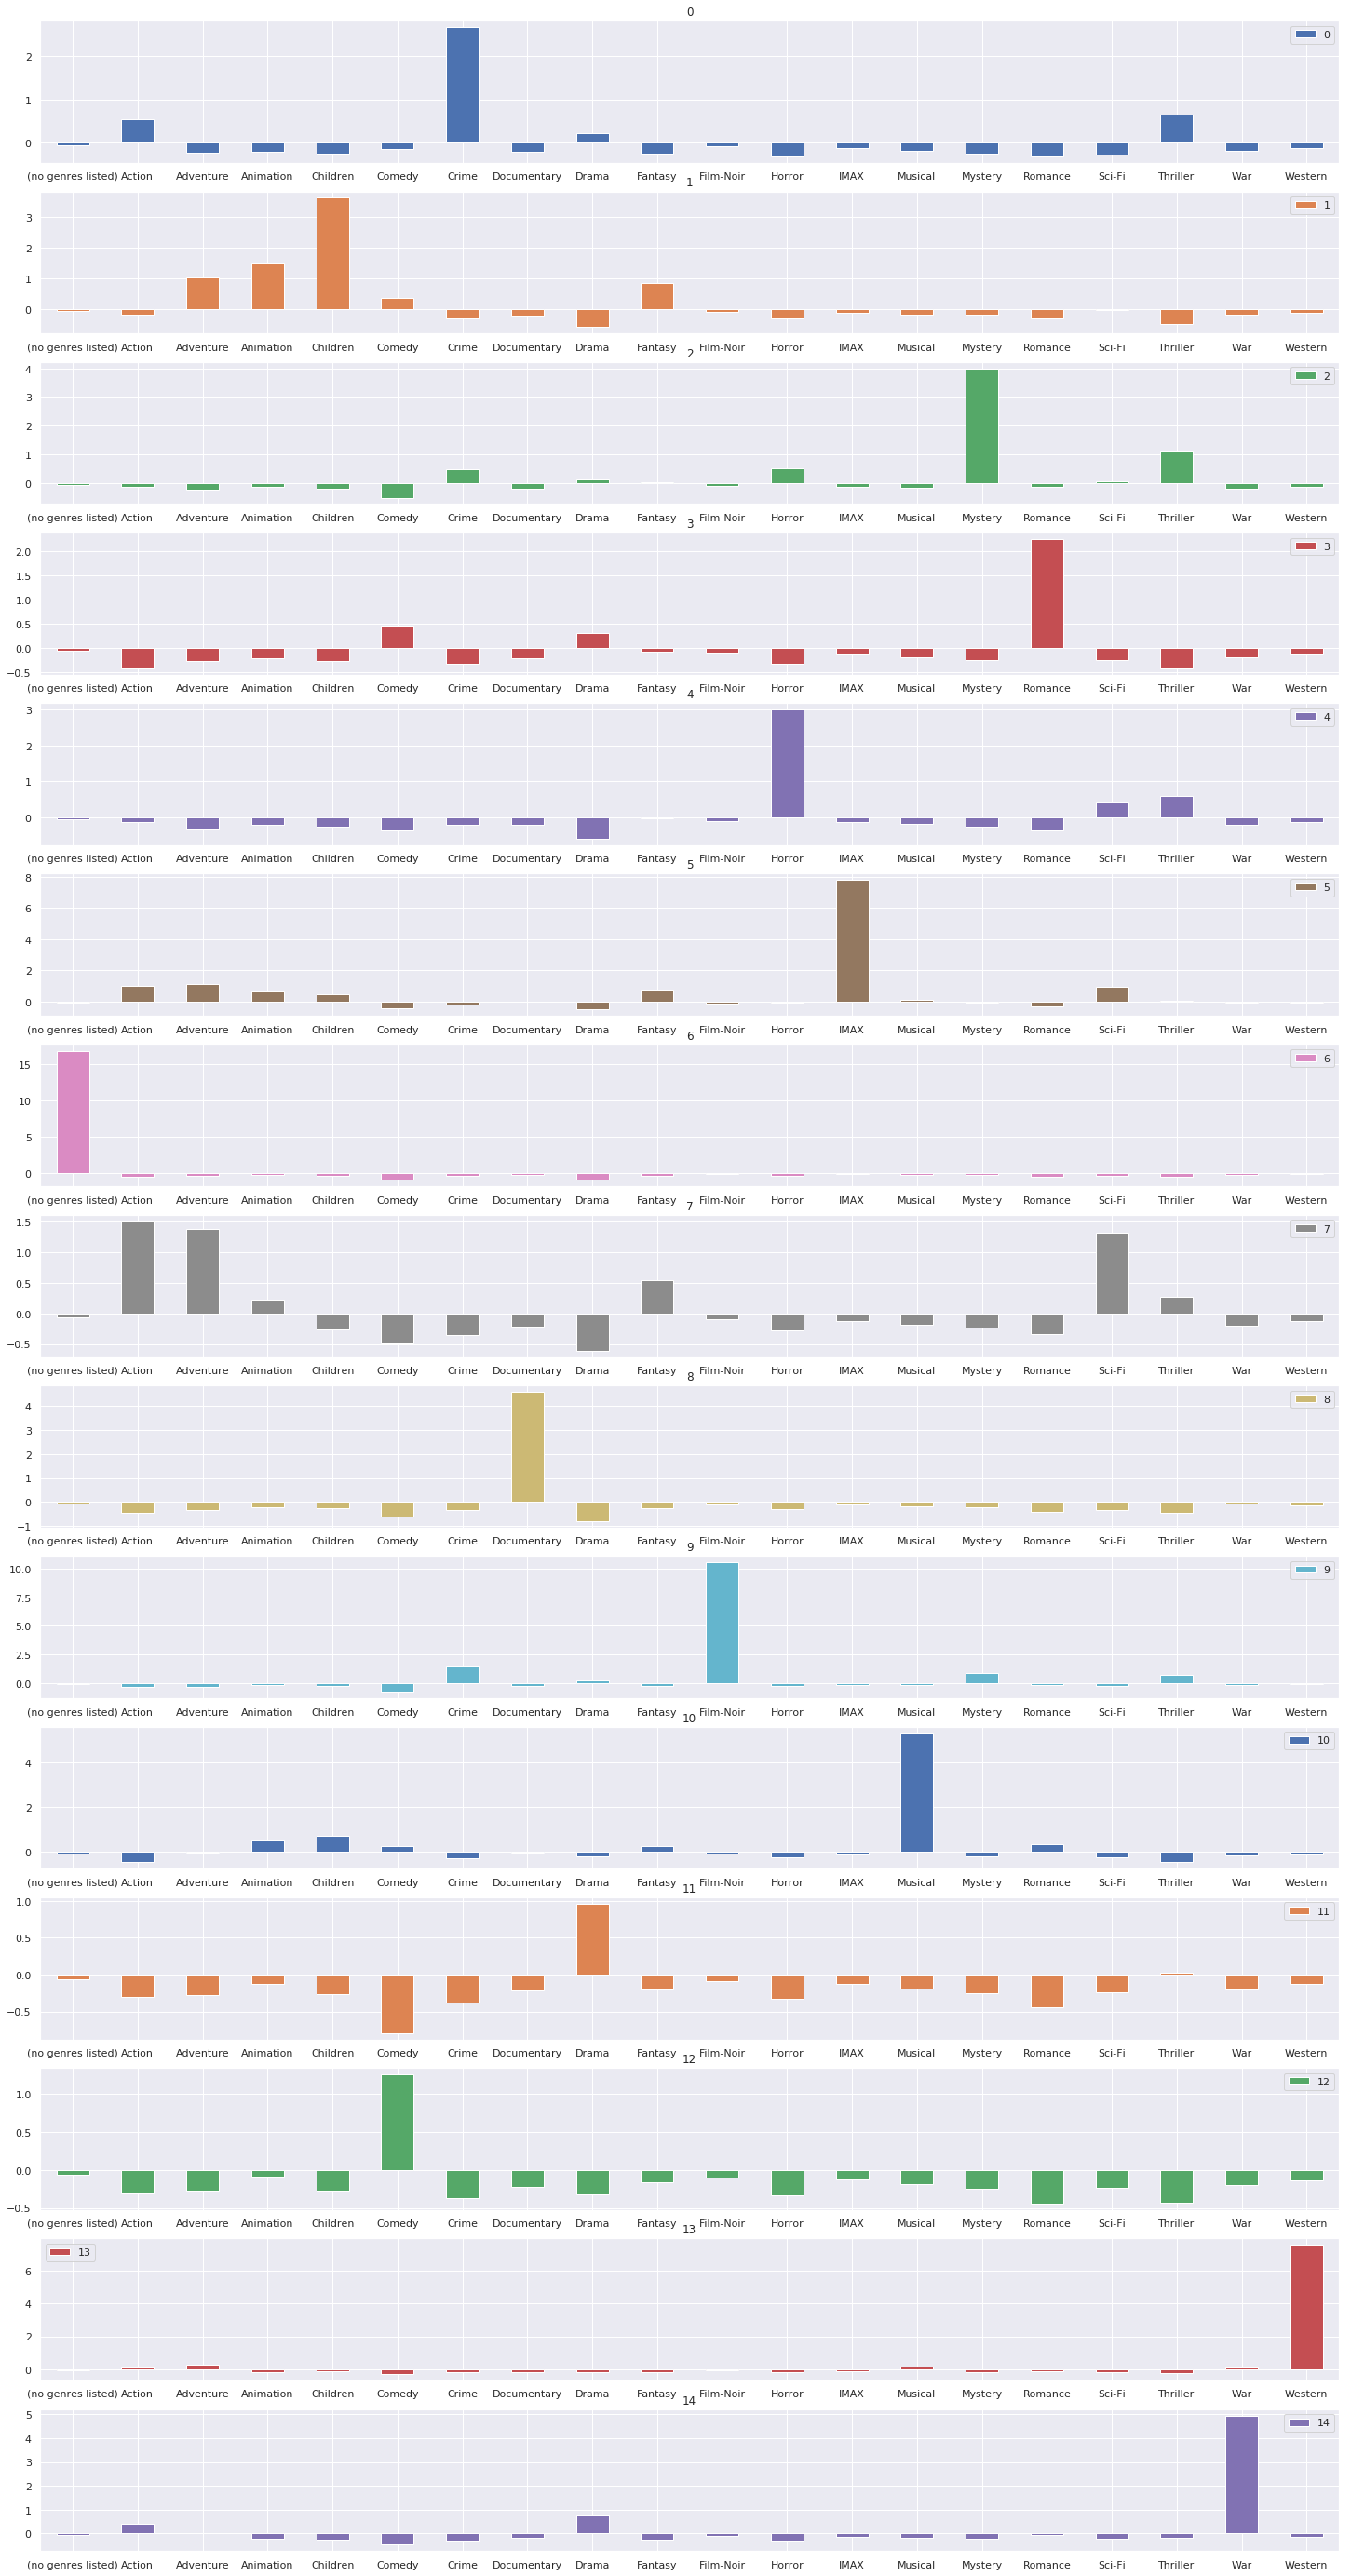

In [53]:
modelo = KMeans(n_clusters=15)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

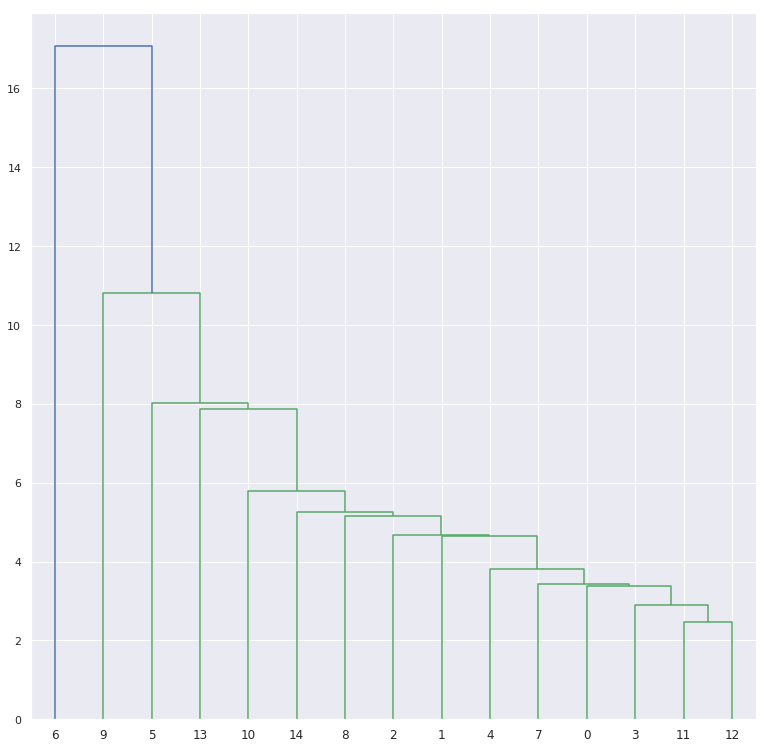

In [54]:
matriz_de_distancia = linkage(grupos)

dendrograma = dendrogram(matriz_de_distancia)